Ploting 

In [113]:
##Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.patches as mpatches
from matplotlib import rcParams, cycler

from sklearn.model_selection import train_test_split

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
#import scikitplot as skplt
import datetime

In [ ]:
train = pd.read_csv('https://disk.bg/s/UFQtiaqlTDj2SZX/download')  # train data 
test = pd.read_csv('https://disk.bg/s/VYmtGL4lzcHdcCl/download')   # test data


In [11]:
# separating data inputs and output lables 
train_data  = train.drop('Activity' , axis=1).values
label_data = train['Activity'].values

test_data = test.drop('Activity' , axis=1).values
test_label = test['Activity'].values


print('train data shape ' ,train_data.shape)
print('label data shape' ,label_data.shape)

print('train data test shape' ,test_data.shape)
print('label_data_test shape' ,test_data.shape)

train data shape  (7352, 562)
label data shape (7352,)
train data test shape (2947, 562)
label_data_test shape (2947, 562)


In [ ]:
###applying standart scaller over test and train data
scaler = StandardScaler()
scaler.fit(train_data)
train_data = a.transform(train_data)
scaler.fit(test_data)
test_data = a.transform(test_data)

In [29]:
pca = PCA()
pca.fit(train_data)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [33]:
tranformed_train_data = pca.transform(train_data)
tranformed_data_test= pca.transform(test_data)

tranformed_train_data = tranformed_train_data[:,:3]
tranformed_data_test = tranformed_data_test[:,:3]



In [34]:
activity = np.unique(label_data)
activity

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [101]:
def activity_to_colors(activity):
    if activity=='LAYING':
        return 'yellow'
    elif activity=='SITTING':
        return 'blue' 
    elif activity=='STANDING':
        return 'red'  
    elif activity=='WALKING':
        return 'pink' 
    elif activity=='WALKING_DOWNSTAIRS':
        return 'purple' 
    elif activity=='WALKING_UPSTAIRS':
        return 'gray'



In [102]:
colors = np.array([activity_to_colors(i)  for i in label_data])
colors

array(['red', 'red', 'red', ..., 'gray', 'gray', 'gray'], dtype='<U6')

In [120]:
color=np.unique(colors)
color
#red_patch = mpatches.Patch(['red','gree', label=['f','n'])
activity

array(['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

In [126]:
def visialise_dimensaly_reduction(tranformed_train_data,colors):
    fig = plt.figure(figsize=[20,20])
    ax = fig.add_subplot(111, projection='3d')
    lines = ax.scatter(tranformed_train_data[:,0], tranformed_train_data[:,1], tranformed_train_data[:,2],c = colors,\
           alpha=0.5,edgecolors='none')

    yellow_patch = mpatches.Patch(color='yellow', label='LAYING')
    blue_patch = mpatches.Patch(color='blue', label='SITTING')
    red_patch = mpatches.Patch(color='red', label='STANDING')
    green_pink = mpatches.Patch(color='pink', label='WALKING')
    purple_patch = mpatches.Patch(color='purple', label='WALKING_DOWNSTAIRS')
    gray_patch = mpatches.Patch(color='gray', label='WALKING_UPSTAIRS')

    plt.legend(handles=[yellow_patch, blue_patch,red_patch,green_pink,purple_patch,gray_patch])

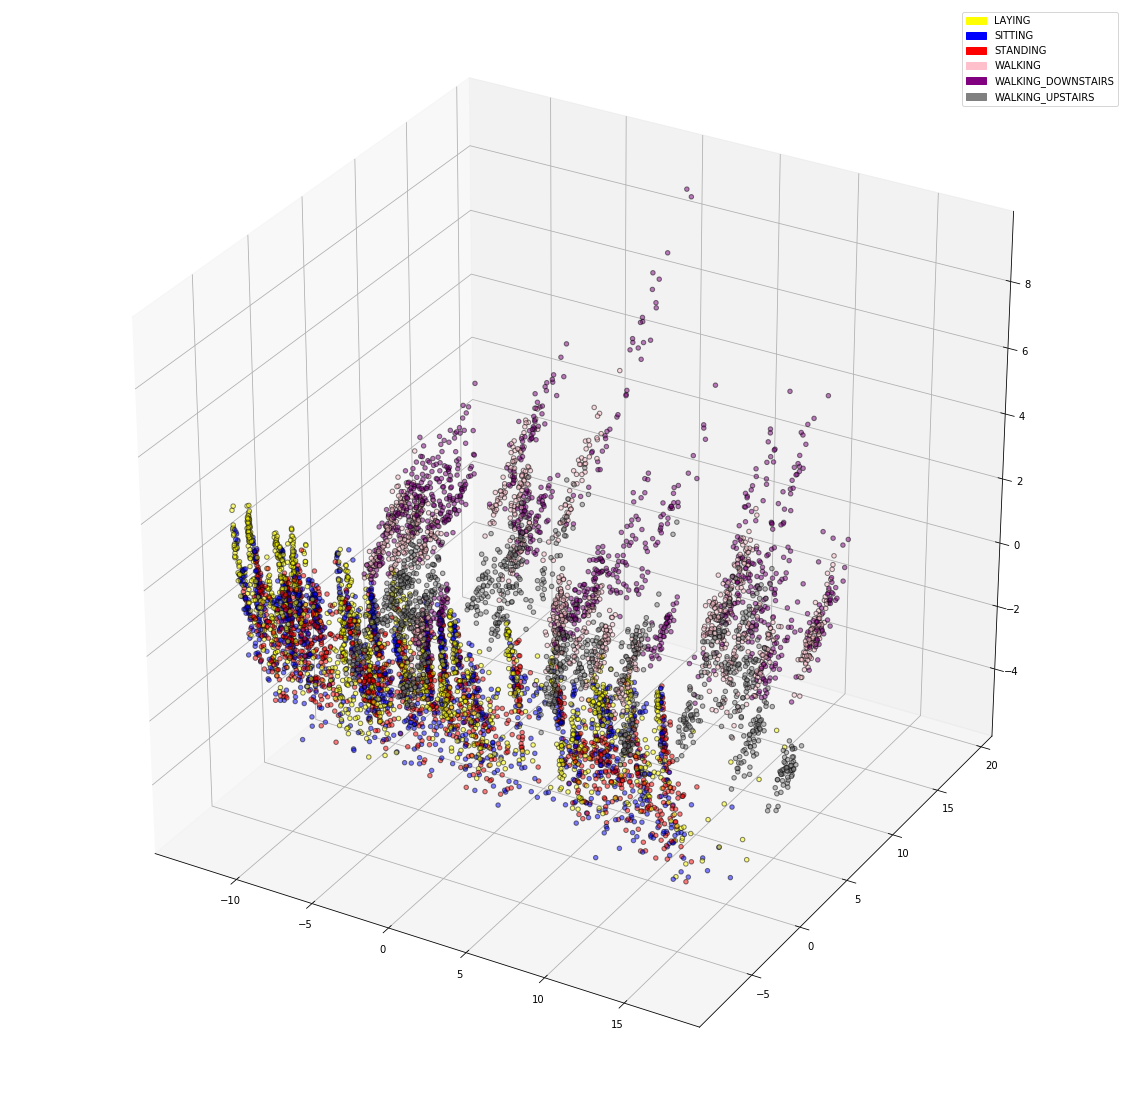

In [127]:
visialise_dimensaly_reduction(tranformed_train_data,colors)